# KMEANS implementation

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [675]:
def print_current_state(centroids):
    """
    Helper function that plots 2D centroids and vectors associated
    to each centroid
    """
    colors=["dodgerblue", "salmon", "green"]
    
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid.assigned_vectors[:, 0], 
                    centroid.assigned_vectors[:, 1], 
                    c=colors[i],
                    s=100)
        plt.scatter(centroid.position[0], 
                    centroid.position[1], 
                    c=colors[i],
                    edgecolor="k",
                    s=300)
    plt.show()

In [685]:
class Centroid:
    """
    position - vector, position of the centroid 
    """
    def __init__(self, position):
        self.position = position
        self.assigned_vectors = []
        
    def __repr__(self):
        return f"""
        centroid: {self.position},
        assigned_vectors: {self.assigned_vectors}
        """

class KMeans:
    """
    n_clusters - number of desired clusters
    max_iter   - maximum number of iterations that the algorithm will make 
                 while looking for an optimal position of centroids
    tol        - training stops as soon as none of the centroids moved more than this number 
    n_iter     - number of times that training will run from the beginning, each time computing 
                 WCSS (within cluster sum of squares), keeping the best solution
    """
    def __init__(self, n_clusters=2, max_iter=300, tol=0.0001, n_init=10):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.n_init = n_init
        
    @staticmethod
    def _euclidean_distance(x, y):
        """compute euklidean distance between 2 vectors"""
        
        return np.sqrt(((x - y) ** 2).sum())
    
    @staticmethod
    def _compute_wcss(centroids):
        """compute within cluster sum of suqares metric"""
        
        wcss = 0
        for centroid in centroids:
            for vec in centroid.assigned_vectors:
                wcss += KMeans._euclidean_distance(vec, centroid.position)
        return wcss
    
    def _compute_distances(self, X, centroids):
        """
        for each vector in X, find the closest centroid and assign it to that centroid
        """
        
        # remove previously assigned vectors from each centroid
        for centroid in centroids:
            centroid.assigned_vectors = None

        # for each point, compute distance to each centroid and keep the shortest distance
        for x in X:
            shortest_distance = np.inf
            closest_centroid = None

            for centroid in centroids:
                distance = KMeans._euclidean_distance(x, centroid.position)
                if shortest_distance > distance:
                    shortest_distance = distance
                    closest_centroid = centroid

            # assign a point to the closest centorid
            if closest_centroid.assigned_vectors is None:
                closest_centroid.assigned_vectors = np.array([x])
            else:
                closest_centroid.assigned_vectors = np.r_["0,2", 
                                                          closest_centroid.assigned_vectors, x]
                
    def _update_centroids(self, centroids):
        """
        find a new positing of each centroid by computing mean positions 
        of all vectors from the dataset assigned to the particular centroid
        """
        
        for centroid in centroids:
            centroid.position = centroid.assigned_vectors.mean(axis=0)
        
    def fit(self, X):
        """train the model"""
        
        self.wcss = np.inf
        
        # run the training n times to find the best solution
        # in terms of wcss
        for n in range(self.n_init):
            
            # initialize centroids
            np.random.shuffle(X)
            vectors = X[:self.n_clusters, :]
            centroids = [Centroid(vec) for vec in vectors]
            n_iter = 0

            while True:
                prev_positions = np.array([centroid.position for centroid in centroids])

                self._compute_distances(X, centroids)
                self._update_centroids(centroids)

                # compute how much the centroids moved during this iteration
                new_positions = np.array([centroid.position for centroid in centroids])
                movements = np.array([KMeans._euclidean_distance(prev, new) for prev, new 
                                     in zip(prev_positions, new_positions)])

                # if all clusters moved withing the tolerance, end the training
                should_stop = True
                for movement in movements:
                    if movement > self.tol:
                        should_stop = False

                if should_stop:
                    break

                # stop if solution wasn't found in max_iter steps
                if n_iter >= self.max_iter:
                    break
                n_iter += 1

            # if wcss decreased, KMeans found a better solution
            wcss = KMeans._compute_wcss(centroids)
            if wcss < self.wcss:
                self.centroids = centroids
                self.wcss = wcss

In [681]:
X = np.array([[1, 1], 
              [1, 2], 
              [2, 1], 
              [3, 3], 
              [3, 4], 
              [4, 4],
              [4, 1],
              [4, 2],
              [3, 1],
              [1.5, 3],
              [1.5, 1.5]])

In [682]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

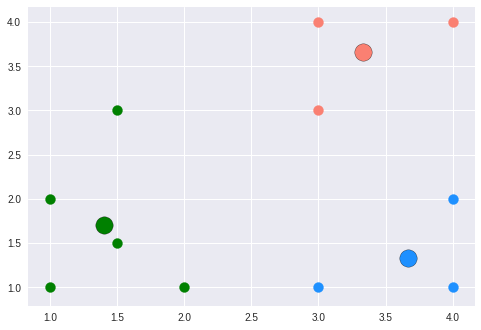

In [683]:
print_current_state(kmeans.centroids)

In [684]:
kmeans.wcss

7.679860510931435